# Análisis predictivo

Antes de empezar cualquier análisis hay que asegurar que las librerías básicas y de uso general (numpy, pandas, etc.) están correctamente importadas.

In [2]:
pip install leaderboard

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 5.2 MB/s eta 0:00:00
  Created wheel for leaderboard: filename=leaderboard-3.7.3-py3-none-any.whl size=15912 sha256=5d6a34b39dc4d61c0b536d8a81763f27e638c658d87bc6e361eafd774ed7749d
  Stored in directory: /root/.cache/pip/wheels/8e/f2/10/0a6a1041577b9affaec5251127f54b420df8af2883d78e861b
Successfully built leaderboard


In [3]:
# carga de datos
import time
import pandas as pd
import io
from google.colab import files
# manipulación y visualización
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
import leaderboard as lb

Cargamos todas las librerias necesarias para nuestro estudio

In [4]:
# machine learning
from feature_selector import FeatureSelector # Nos va a ayudar a realizar el número de missings, correlaciones, importancia de las variables, etc.

# machine learning

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Import models from scikit learn module:
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

from sklearn.utils import resample,shuffle

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [5]:
!pip install nltk

In [6]:
import nltk
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

In [8]:
!pip install chart_studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.2 MB/s eta 0:00:00


In [9]:
import pandas as pd
import numpy as np
import warnings
import plotly.graph_objs as go
import colorlover as cl
from IPython.display import HTML
from IPython.display import display
import chart_studio.plotly as py
from plotly import tools
from sklearn.preprocessing import LabelEncoder,StandardScaler

import cufflinks as cf
cf.go_offline() #will make cufflinks offline
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import iplot

bupu = cl.scales['9']['seq']['BuPu']
HTML( cl.to_html(bupu))

warnings.filterwarnings("ignore")

# Carga de Datos

En primer lugar cargamos los datos dentro del entorno con las funcionalidades que nos permite Google Colab una vez listos desde la etapa anterior.

In [10]:
def upload_files ():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
df = pd.read_excel("/content/Terrorismo_limpio_final (2).xlsx")

In [11]:
data_1="Terrorismo_limpio_final (2)"
df = pd.read_excel(data_1 + ".xlsx", header=0, parse_dates=False, index_col=0)

In [12]:
from numpy.core.multiarray import concatenate
d = df[df['región_txt']=='Sub-Saharan Africa']


In [13]:
import pandas as pd

# Create the original dataframe
d = df[df['región_txt']=='Sub-Saharan Africa']

# Define the function to categorize ages
def categoria_bajas(bajas):
    if bajas < 30:
        return 'pocas'
    elif bajas >= 30 :
        return 'algunas'


# Apply the function to the Age column using the apply() function
d['bajas_categoria'] = d['bajas'].apply(categoria_bajas)

# Print the resulting dataframe
print(d)

      month  day                          país_txt          región_txt  \
year                                                                     
1971      1   22                          Ethiopia  Sub-Saharan Africa   
1972      9   21                             Zaire  Sub-Saharan Africa   
1972      9   21                             Zaire  Sub-Saharan Africa   
1972      9   21                             Zaire  Sub-Saharan Africa   
1972      9   21    People's Republic of the Congo  Sub-Saharan Africa   
...     ...  ...                               ...                 ...   
2019     12   29                             Niger  Sub-Saharan Africa   
2019     12   29                             Sudan  Sub-Saharan Africa   
2019     12   29                           Nigeria  Sub-Saharan Africa   
2019     12   29  Democratic Republic of the Congo  Sub-Saharan Africa   
2019     12   31                          Cameroon  Sub-Saharan Africa   

            ciudad   latitud  longitu

In [14]:
import pandas as pd

# Define the function to categorize ages
def gravedad_bajas(muertos):
    if muertos < 5:
        return 'no_grave'
    elif muertos >= 5 :
        return 'grave'

# Apply the function to the Age column using the apply() function
d['bajas_gravedad'] = d['muertos'].apply(gravedad_bajas)

# Print the resulting dataframe
print(d)

      month  day                          país_txt          región_txt  \
year                                                                     
1971      1   22                          Ethiopia  Sub-Saharan Africa   
1972      9   21                             Zaire  Sub-Saharan Africa   
1972      9   21                             Zaire  Sub-Saharan Africa   
1972      9   21                             Zaire  Sub-Saharan Africa   
1972      9   21    People's Republic of the Congo  Sub-Saharan Africa   
...     ...  ...                               ...                 ...   
2019     12   29                             Niger  Sub-Saharan Africa   
2019     12   29                             Sudan  Sub-Saharan Africa   
2019     12   29                           Nigeria  Sub-Saharan Africa   
2019     12   29  Democratic Republic of the Congo  Sub-Saharan Africa   
2019     12   31                          Cameroon  Sub-Saharan Africa   

            ciudad   latitud  longitu

In [15]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14131 entries, 1971 to 2019
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                14131 non-null  int64         
 1   day                  14131 non-null  int64         
 2   país_txt             14131 non-null  object        
 3   región_txt           14131 non-null  object        
 4   ciudad               14131 non-null  object        
 5   latitud              14131 non-null  int64         
 6   longitud             14131 non-null  int64         
 7   crit                 14131 non-null  int64         
 8   multiple             14131 non-null  int64         
 9   éxito                14131 non-null  int64         
 10  suicidio             14131 non-null  int64         
 11  tipodeataque_txt     14131 non-null  object        
 12  tipoobjetivo         14131 non-null  object        
 13  nacionalidadvictima  14131 no

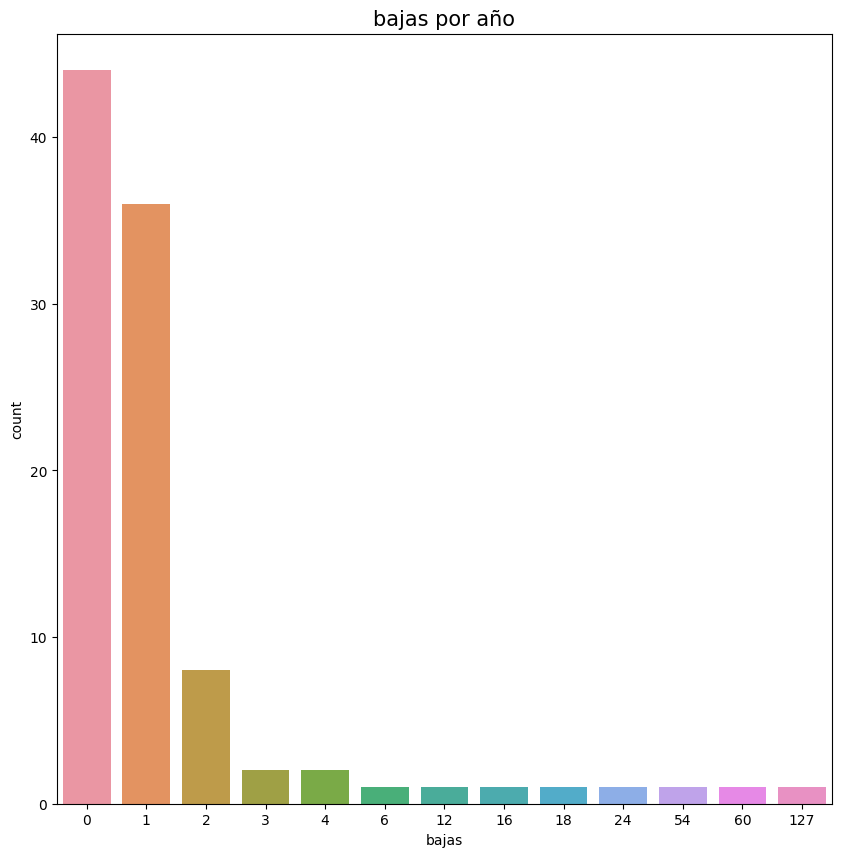

In [16]:
plt.figure(figsize=(10,10))
ax = sns.countplot(x = "bajas" , data= d[0:100])
ax.set_title('bajas por año', size = 15)
plt.savefig('bajas por año.png')

<Axes: >

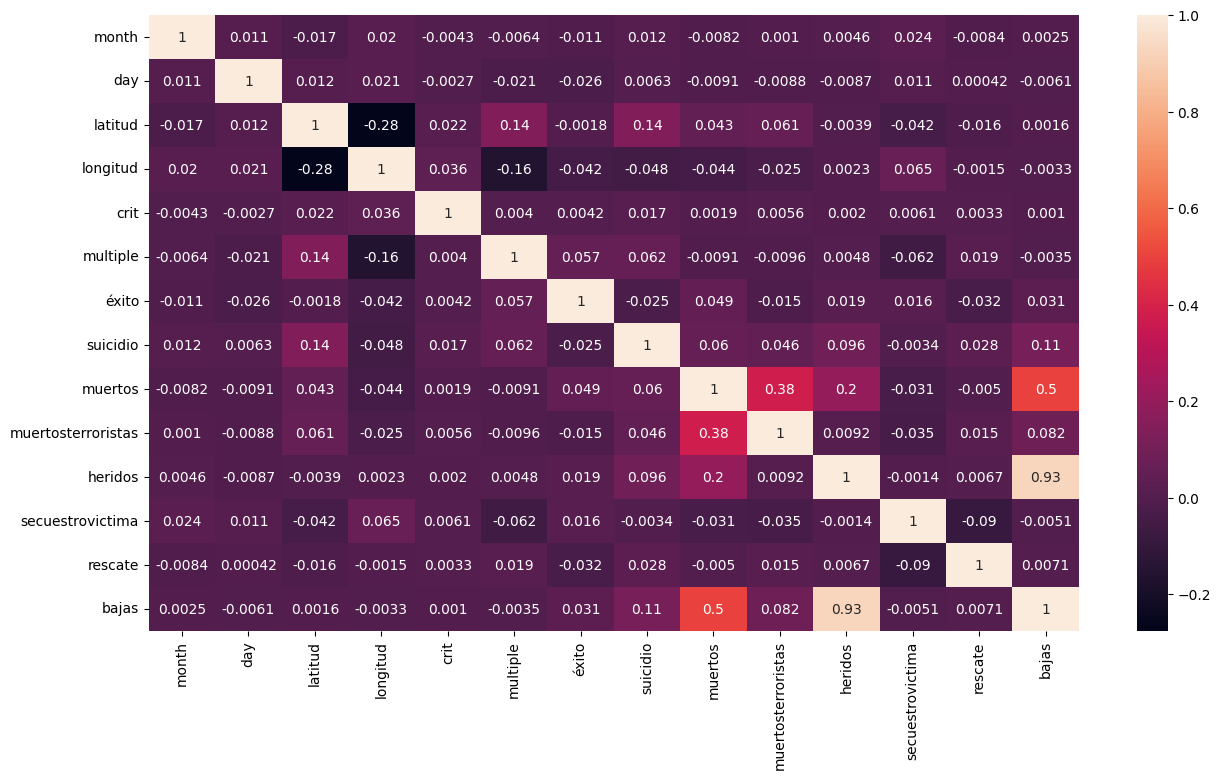

In [17]:
plt.figure(figsize = (15,8))
sns.heatmap(d.corr(), annot=True)

In [18]:
import pandas as pd
import numpy as np
import warnings
import plotly.graph_objs as go
import colorlover as cl
from IPython.display import HTML
from IPython.display import display
import chart_studio.plotly as py
from plotly import tools
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from itertools import cycle
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, recall_score, auc, roc_auc_score, confusion_matrix, log_loss, precision_score,recall_score

import cufflinks as cf
cf.go_offline() #will make cufflinks offline
cf.set_config_file(offline=False, world_readable=True)
from plotly.offline import iplot

bupu = cl.scales['9']['seq']['BuPu']
HTML( cl.to_html(bupu))

warnings.filterwarnings("ignore")

In [21]:
!pip install basemap

In [22]:
# libraries for EDA
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

#libraries for Data Preprocessing
import pandas as pd
import numpy as np
import scipy as sc
import itertools

#libraries for Data Mining - Classification
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

#library for plotting crimes on Asia map
from mpl_toolkits.basemap import Basemap

#library to suppress warnings
import warnings

#suppress warnings
warnings.filterwarnings('ignore')

In [23]:
X = d.drop(['longitud','latitud','day','month','fecha','bajas','bajas_gravedad', 'bajas_categoria'], axis = 1)

In [24]:
X.shape


(14131, 19)

In [25]:
#separate dtypes
cat_data = X.select_dtypes(exclude=['int','float','int64','float64'])
num_data = X.select_dtypes(include=['int','float','int64','float64'])
print('catagory data columns',cat_data.columns)
print("\n Numeric data columns",num_data.columns)

print(cat_data.shape)
print(num_data.shape)

catagory data columns Index(['país_txt', 'región_txt', 'ciudad', 'tipodeataque_txt', 'tipoobjetivo',
       'nacionalidadvictima', 'organizacion', 'tipoarmamento', 'sumario',
       'motivo'],
      dtype='object')

 Numeric data columns Index(['crit', 'multiple', 'éxito', 'suicidio', 'muertos',
       'muertosterroristas', 'heridos', 'secuestrovictima', 'rescate'],
      dtype='object')
(14131, 10)
(14131, 9)


In [26]:
obj_lable_encoded = cat_data.apply(LabelEncoder().fit_transform)

In [27]:
# concatenating feaures
X_final = pd.concat([obj_lable_encoded,num_data], axis=1, sort=False)
Y_final = d['bajas_gravedad']

In [28]:
X_final.shape , Y_final.shape

((14131, 19), (14131,))

In [29]:
extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy', max_features = 2)

In [30]:
extra_tree_forest.fit(X_final, Y_final)

ExtraTreesClassifier(criterion='entropy', max_features=2, n_estimators=5)

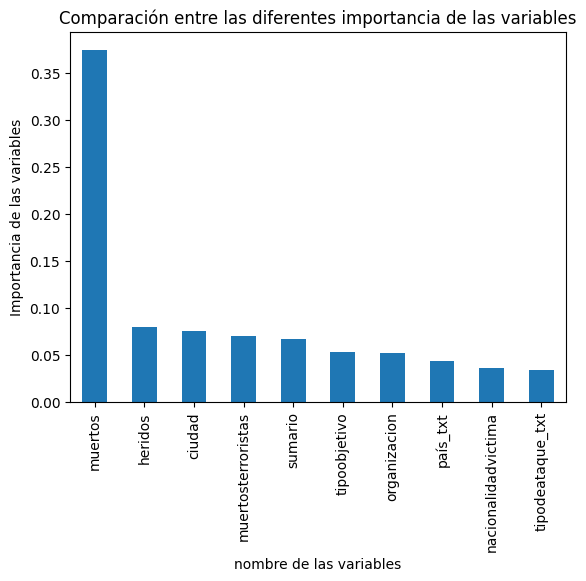

In [31]:
feat_importances = pd.Series(extra_tree_forest.feature_importances_, index=X_final.columns)
plt.xlabel('nombre de las variables')
plt.ylabel('Importancia de las variables')
plt.title('Comparación entre las diferentes importancia de las variables')
feat_importances.nlargest(10).plot.bar()
plt.show()

In [32]:
best_selected_features = feat_importances.nlargest(10).keys().to_list()

In [33]:
best_selected_features

['muertos',
 'heridos',
 'ciudad',
 'muertosterroristas',
 'sumario',
 'tipoobjetivo',
 'organizacion',
 'país_txt',
 'nacionalidadvictima',
 'tipodeataque_txt']

In [34]:
X_col = X_final.columns

In [35]:
drop_feature_list = []

for col_val in X_col:
    if col_val not in best_selected_features:
        drop_feature_list.append(col_val)

In [36]:
drop_feature_list

['región_txt',
 'tipoarmamento',
 'motivo',
 'crit',
 'multiple',
 'éxito',
 'suicidio',
 'secuestrovictima',
 'rescate']

In [37]:
X_final = X_final.drop(drop_feature_list, axis=1)
X_final.shape

(14131, 10)

In [38]:
X_final.describe()

,país_txt,ciudad,tipodeataque_txt,tipoobjetivo,nacionalidadvictima,organizacion,sumario,muertos,muertosterroristas,heridos
count,14131.000000,14131.000000,14131.00000,14131.000000,14131.000000,14131.000000,14131.000000,14131.000000,14131.000000,14131.000000
mean,25.651759,2537.026467,2.41179,9.718845,52.649706,123.859812,6080.143797,5.276414,1.019956,3.111103
std,11.470154,1442.991491,2.69650,4.148380,23.639199,123.912979,3022.489588,19.267760,7.013516,36.636206
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,1241.000000,0.00000,8.000000,34.000000,18.000000,3441.500000,0.000000,0.000000,0.000000
50%,27.000000,2666.000000,2.00000,11.000000,57.000000,78.000000,6904.000000,1.000000,0.000000,0.000000
75%,35.000000,3504.000000,3.00000,12.000000,74.000000,192.000000,9050.000000,4.000000,0.000000,1.000000
max,45.000000,5118.000000,8.00000,20.000000,97.000000,494.000000,9050.000000,1180.000000,250.000000,4000.000000


In [39]:
#method to parse and plot sklearn confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

In [40]:
from sklearn.model_selection import train_test_split

def get_min_required_rows(test_size=0.2):
    return 1 / test_size

def make_stratified_splits(df, y_col="label", test_size=0.2):
    """
        for any class with rows less than min_required_rows corresponding to the input test_size,
        all the rows associated with the specific class will have a copy in both the train and test splits.

        example: if test_size is 0.2 (20% otherwise),
        min_required_rows = 5 (which is obtained from 1 / test_size i.e., 1 / 0.2)
        where the resulting splits will have 4 train rows (80%), 1 test row (20%)..
    """

    id_col = "id"
    temp_col = "same-class-rows"

    class_to_counts = df[y_col].value_counts()
    df[temp_col] = df[y_col].apply(lambda y: class_to_counts[y])

    min_required_rows = get_min_required_rows(test_size)
    copy_rows = df[df[temp_col] < min_required_rows].copy(deep=True)
    valid_rows = df[df[temp_col] >= min_required_rows].copy(deep=True)

    X = valid_rows[id_col].tolist()
    y = valid_rows[y_col].tolist()

    # notice, this train_test_split is a stratified split
    X_train, X_test, _, _ = train_test_split(X, y, test_size=test_size, random_state=43, stratify=y)

    X_test = X_test + copy_rows[id_col].tolist()
    X_train = X_train + copy_rows[id_col].tolist()

    df.drop([temp_col], axis=1, inplace=True)

    test_df = df[df[id_col].isin(X_test)].copy(deep=True)
    train_df = df[df[id_col].isin(X_train)].copy(deep=True)

    print (f"number of rows in the original dataset: {len(df)}")

    test_prop = round(len(test_df) / len(df) * 100, 2)
    train_prop = round(len(train_df) / len(df) * 100, 2)
    print (f"number of rows in the splits: {len(train_df)} ({train_prop}%), {len(test_df)} ({test_prop}%)")

    return train_df, test_df

In [41]:
df2 = d.drop(['organizacion','crit','rescate' , 'motivo','sumario','longitud','latitud','day','month','fecha','bajas','bajas_gravedad', 'bajas_categoria'] , axis=1)
df1 = d.bajas_categoria

In [42]:
#Stratified sampling of dataset
X = df2
Y = df1
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=1/3, random_state=85)
expected = ytest
#Lable encoding of objects -> numeric_objects
le=LabelEncoder()
for col in xtest.columns.values:
    if xtest[col].dtypes=='object':
       data=xtrain[col].append(xtest[col])
       le.fit(data.values)
       xtrain[col]=le.transform(xtrain[col])
       xtest[col]=le.transform(xtest[col])

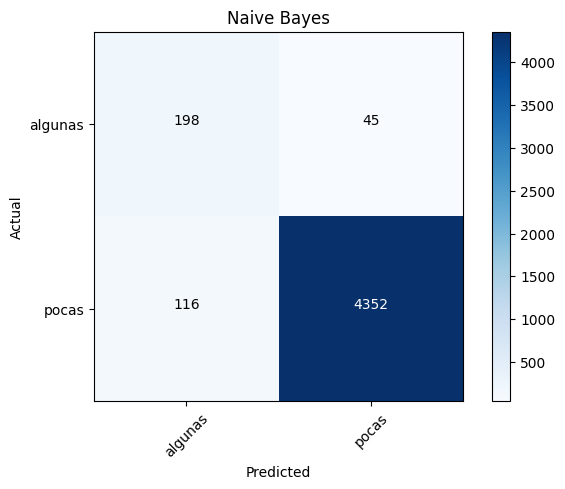

In [43]:
#Train Gaussian Naive Bayes model and get performance measures
model1 = GaussianNB()
model1.fit(xtrain, ytrain)
predicted1 = model1.predict(xtest)

cr1 = metrics.classification_report(expected, predicted1)
cm1 = metrics.confusion_matrix(expected, predicted1)

fs1 = f1_score(expected, predicted1, average="macro")
ps1 = precision_score(expected, predicted1, average="macro")
rs1 = recall_score(expected, predicted1, average="macro")
as1 = accuracy_score(expected, predicted1)

plt.figure()
plot_confusion_matrix(cm1, classes=model1.classes_, title='Naive Bayes')

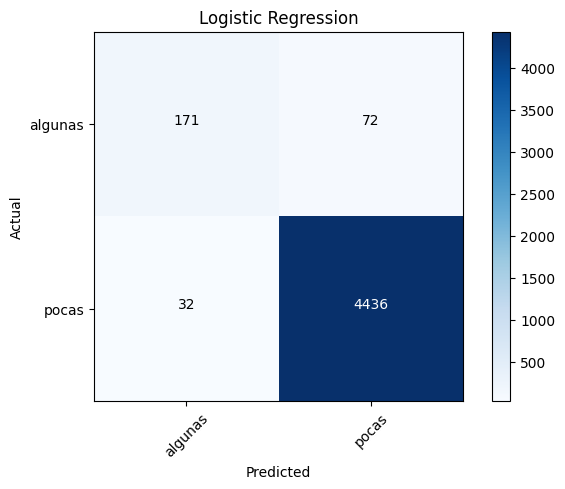

In [44]:
#Train Logistic regression model and get performance measures
model2 = LogisticRegression()
model2.fit(xtrain, ytrain)
predicted2 = model2.predict(xtest)

cr2 = metrics.classification_report(expected, predicted2)
cm2 = metrics.confusion_matrix(expected, predicted2)

fs2 = f1_score(expected, predicted2, average="macro")
ps2 = precision_score(expected, predicted2, average="macro")
rs2 = recall_score(expected, predicted2, average="macro")
as2 = accuracy_score(expected, predicted2)
plt.figure()
plot_confusion_matrix(cm2, classes=model2.classes_, title='Logistic Regression')

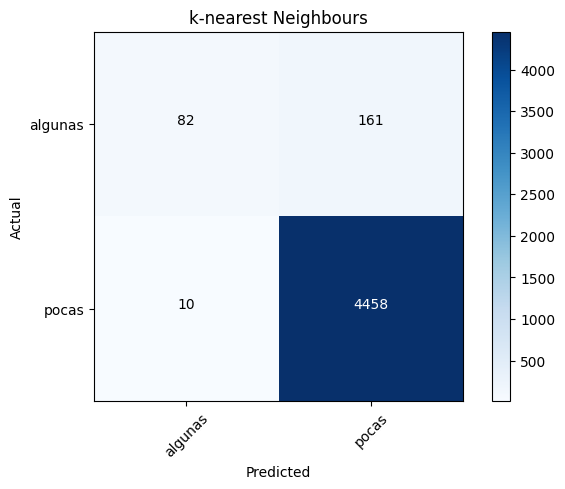

In [45]:
#Train kNN model and get performance measures
model3 = KNeighborsClassifier()
model3.fit(xtrain, ytrain)
predicted3 = model3.predict(xtest)

cr3 = metrics.classification_report(expected, predicted3)
cm3 = metrics.confusion_matrix(expected, predicted3)

fs3 = f1_score(expected, predicted3, average="macro")
ps3 = precision_score(expected, predicted3, average="macro")
rs3 = recall_score(expected, predicted3, average="macro")
as3 = accuracy_score(expected, predicted3)
plt.figure()
plot_confusion_matrix(cm3, classes=model3.classes_, title='k-nearest Neighbours')

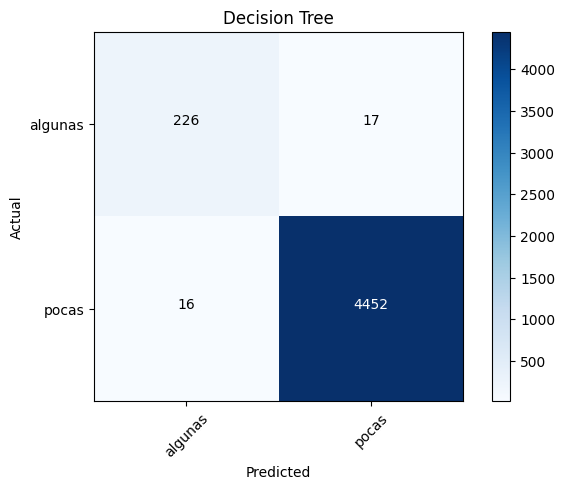

In [46]:
#Train Decision Tree model and get performance measures
model4 = DecisionTreeClassifier()
model4.fit(xtrain, ytrain)
predicted4 = model4.predict(xtest)

cr4 = metrics.classification_report(expected, predicted4)
cm4 = metrics.confusion_matrix(expected, predicted4)

fs4 = f1_score(expected, predicted4, average="macro")
ps4 = precision_score(expected, predicted4, average="macro")
rs4 = recall_score(expected, predicted4, average="macro")
as4 = accuracy_score(expected, predicted4)
plt.figure()
plot_confusion_matrix(cm4, classes=model4.classes_, title='Decision Tree')

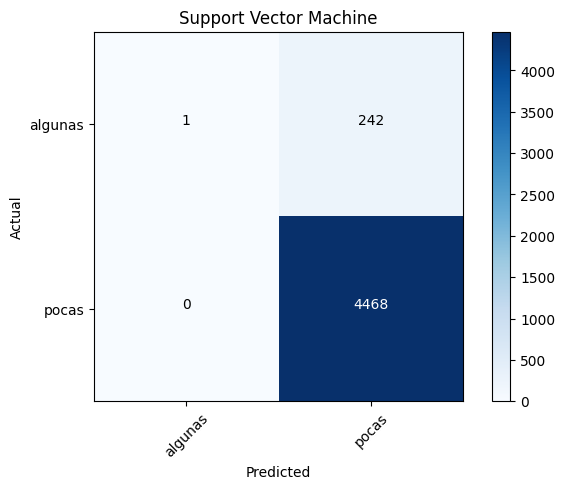

In [47]:
#Train Support Vector Machine model and get performance measures
model5 = SVC()
model5.fit(xtrain, ytrain)
predicted5 = model5.predict(xtest)

cr5 = metrics.classification_report(expected, predicted5)
cm5 = metrics.confusion_matrix(expected, predicted5)

fs5 = f1_score(expected, predicted5, average="macro")
ps5 = precision_score(expected, predicted5, average="macro")
rs5 = recall_score(expected, predicted5, average="macro")
as5 = accuracy_score(expected, predicted5)
plt.figure()
plot_confusion_matrix(cm5, classes=model5.classes_, title='Support Vector Machine')

In [48]:
#dictionaries for performance measure of all 5 models
acc_scores = pd.Series([as1, as2, as3, as4, as5])
pre_scores = pd.Series([ps1, ps2, ps3, ps4, ps5])
rec_scores = pd.Series([rs1, rs2, rs3, rs4, rs5])
f1_scores = pd.Series([fs1, fs2, fs3, fs4, fs5])
labels = ['Naive Bayes', 'Logistic Regression', 'kNN', 'Decision Tree', 'SVM']

[Text(0, 0, 'Naive Bayes'),
 Text(1, 0, 'Logistic Regression'),
 Text(2, 0, 'kNN'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'SVM')]

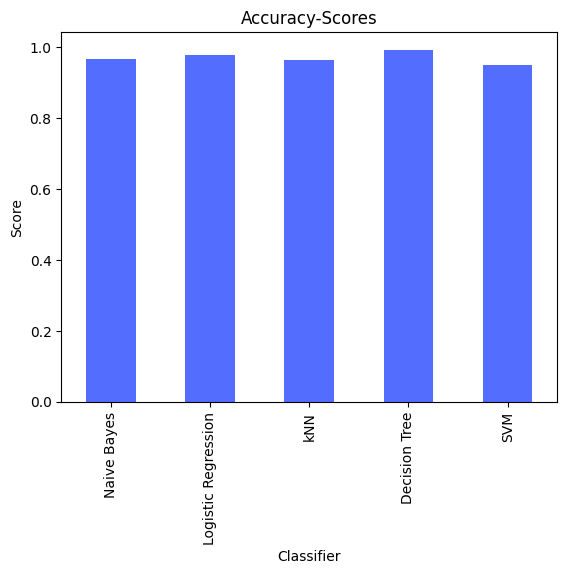

In [49]:
#Accuracy Score Comparison
plt9 = acc_scores.plot(kind='bar', color = '#536dfe')
plt9.set(title = "Accuracy-Scores", xlabel = "Classifier", ylabel = "Score")
plt9.set_xticklabels(labels)

[Text(0, 0, 'Naive Bayes'),
 Text(1, 0, 'Logistic Regression'),
 Text(2, 0, 'kNN'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'SVM')]

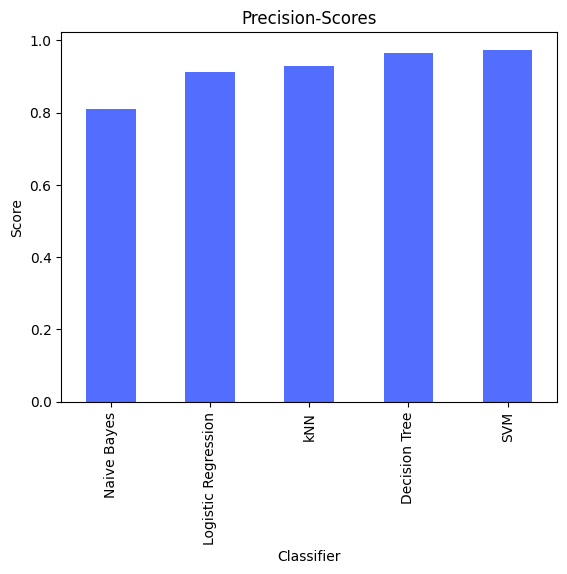

In [50]:
#Precision Score Comparison
plt10 = pre_scores.plot(kind='bar', color = '#536dfe')
plt10.set(title = "Precision-Scores", xlabel = "Classifier", ylabel = "Score")
plt10.set_xticklabels(labels)

[Text(0, 0, 'Naive Bayes'),
 Text(1, 0, 'Logistic Regression'),
 Text(2, 0, 'kNN'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'SVM')]

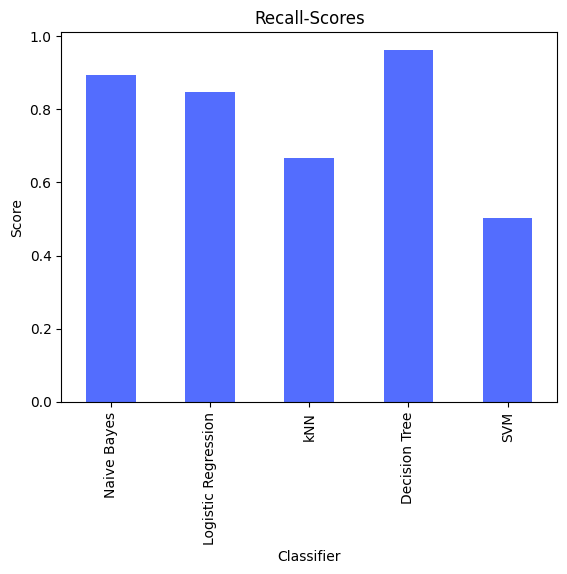

In [51]:
#Recall Score Comparison
plt11 = rec_scores.plot(kind='bar', color = '#536dfe')
plt11.set(title = "Recall-Scores", xlabel = "Classifier", ylabel = "Score")
plt11.set_xticklabels(labels)

[Text(0, 0, 'Naive Bayes'),
 Text(1, 0, 'Logistic Regression'),
 Text(2, 0, 'kNN'),
 Text(3, 0, 'Decision Tree'),
 Text(4, 0, 'SVM')]

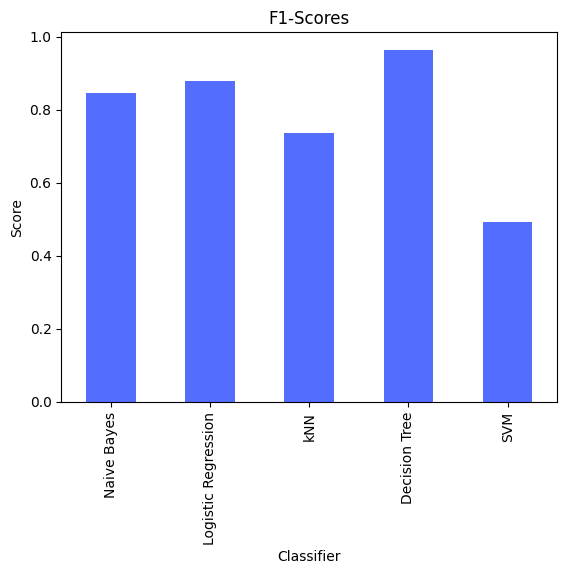

In [52]:
#F1-Score Comparison
plt12 = f1_scores.plot(kind='bar', color = '#536dfe')
plt12.set(title = "F1-Scores", xlabel = "Classifier", ylabel = "Score")
plt12.set_xticklabels(labels)

In [53]:
table=pd.DataFrame({"Accuracy":[as1, as2, as3, as4, as5],
                    "Recall":[rs1, rs2, rs3, rs4, rs5],
                    "Precision ":[ps1, ps2, ps3, ps4, ps5],
                   "f1_scores ":[fs1, fs2, fs3, fs4, fs5]},
                   index=['Naive Bayes', 'Logistic Regression', 'kNN', 'Decision Tree', 'SVM'])
table

,Accuracy,Recall,Precision,f1_scores
Naive Bayes,0.965825,0.894426,0.810169,0.846395
Logistic Regression,0.977924,0.848271,0.913196,0.877615
kNN,0.963702,0.667605,0.928224,0.735367
Decision Tree,0.992995,0.963230,0.965040,0.964133
SVM,0.948631,0.502058,0.974310,0.490915
